In [3]:
import polars as pl
from dotenv import load_dotenv
import pprint

from agents.knowledge import WissensAgent, WissensAgentState, Gedankengang, GedankengangBewertung

# wir laden alle system variablen für unsere API anbindungen
load_dotenv()

# wir laden die Beispiele
df = pl.read_excel("./beispiele.xlsx")
beispiele = [
    {
        "frage": r['orginal_frage'],
        "gedanken": r['gedanken'],
        "antwort": r['antwort'],
        "bewertung": {
            "bezug_auf_quellen": str(r['bewertung_bezug_auf_quellen']),
            "bezug_auf_sachverhalt": str(r['bewertung_bezug_auf_sachverhalt']),
            "gedankengang_effizienz": str(r['bewertung_gedankengang_effizienz']),
        }
    }
    for r in df.iter_rows(named=True)
]
    

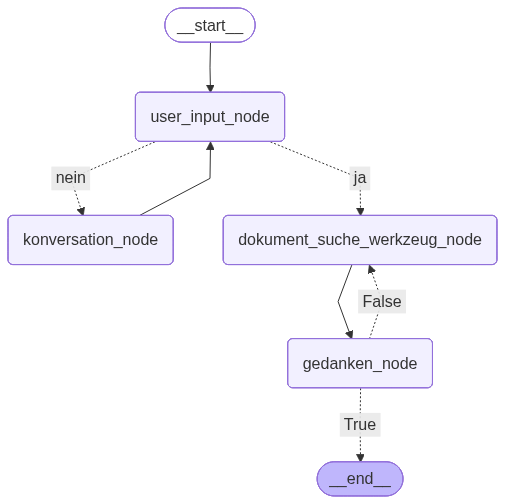

In [5]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

agent = WissensAgent(
    max_llm_calls = 3,
    erwuenschte_note = 2.4
).compile()

display(Image(agent.get_graph().draw_mermaid_png()))

In [ ]:

o = agent.invoke(
    WissensAgentState(
        konversation=[],
        klassifikation=None,
        llm_calls=0,
        dokument_elemente_in_kontext=[],
        gedankengang=None,
        beispiele=beispiele
    )
)

print(f"[FINALE ANTWORT]: {o['gedankengang']['antwort'].content}")